In [3]:
import numpy as np
import pylab as plt
from numpy.linalg import svd
from numpy.linalg import norm

def PCA(F, varRetained = 0.95, show = False):
    
    
    U, d, Vt = np.linalg.svd(F, full_matrices=False)
    dSum = np.sum(d)
    cumVars = np.array([np.sum(d[: i+1]) for i in range(len(d))]) / dSum
    m = np.argmax(cumVars >= varRetained) 
    
    Vt_reduced = Vt[: m+1, :]
    G = F.dot(Vt_reduced.T)
    
    if show:
        plt.plot(cumVars)
        plt.xlabel('Number of Features')
        plt.ylabel(' Percentage Variance retained')
        plt.title('PCA $\% \sigma^2 $ vs # features')
        plt.show()
   
    print ('{0:.3f} variance retained in {k} dimensions'.format(cumVars[m], k=m+1))
    
    return G, Vt_reduced.T 

In [4]:
# Примените алгоритм к данным MNIST
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.7)

Performing PCA - Principal Component Analysis


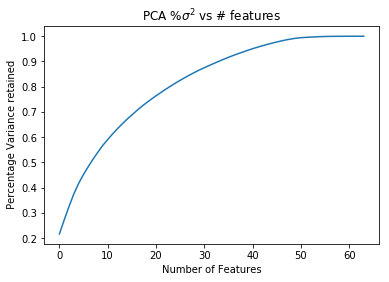

0.951 variance retained in 41 dimensions


In [6]:
# PCA of training set
print ('Performing PCA - Principal Component Analysis')

G, U_reduced = PCA(X, varRetained = 0.95, show = True)

In [4]:
# why? :D
print (G)
print
print (U_reduced)

[[ 45.86127719  -1.19211574  21.10005932 ...,   1.08339635   0.27960357
    1.68768446]
 [ 55.52967927   7.86176977 -20.4871986  ...,  -0.2623479    0.72494338
   -1.54482851]
 [ 55.8278837    6.91459576  -9.66245273 ...,   1.0340708    3.325644
    1.46396004]
 ..., 
 [ 65.52698526  10.65872857  -6.2945608  ...,   0.42447577  -1.06720963
    0.53065709]
 [ 58.60616587  -4.9112521   12.72315226 ...,  -0.77783926   0.51014308
   -0.68936325]
 [ 64.44823101  -0.45551347   7.04184347 ...,  -1.06715047   4.76893855
   -0.26638472]]

[[  1.74588012e-18  -6.78969169e-19   1.31513399e-17 ...,   4.13215196e-17
    1.11846999e-17   7.53562180e-17]
 [  5.77192878e-03  -1.73619371e-02  -9.85740003e-03 ...,  -1.05228027e-02
   -6.43467663e-02  -2.29936335e-02]
 [  1.00696020e-01  -2.24200800e-01  -4.48071690e-02 ...,  -9.96581450e-02
    4.26297018e-02  -1.04683652e-01]
 ..., 
 [  1.30885120e-01  -9.01286131e-02   1.83210572e-01 ...,   1.41460626e-01
    6.24506251e-02   2.79911436e-01]
 [  3.9234

TSNE

In [9]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=200)
X_tsne = tsne.fit_transform(X)

In [10]:
db = DBSCAN(eps=25, min_samples=28).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

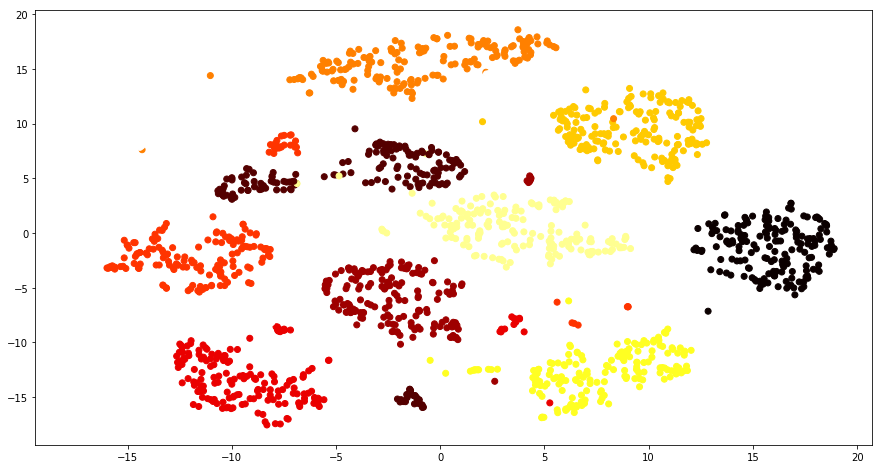

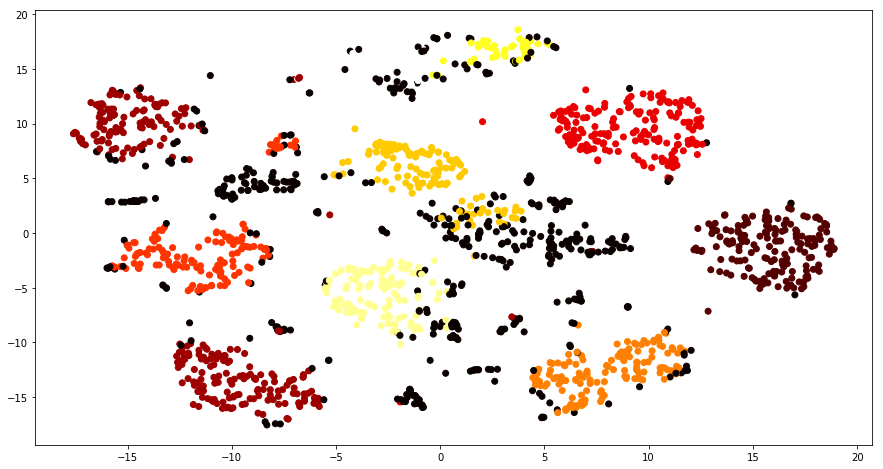

In [11]:
plt.figure(figsize=(15,8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.hot)
plt.show()
plt.figure(figsize=(15,8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap=plt.cm.hot)
plt.show()

В местах со слабой плотностью точек dbscan не может определить их к какому-то кластеру, поэтому получается много черных точек, это можно было бы исправить увеличением радиуса или критерия на кол-во объектов, но это бы привело к большому числу классов.

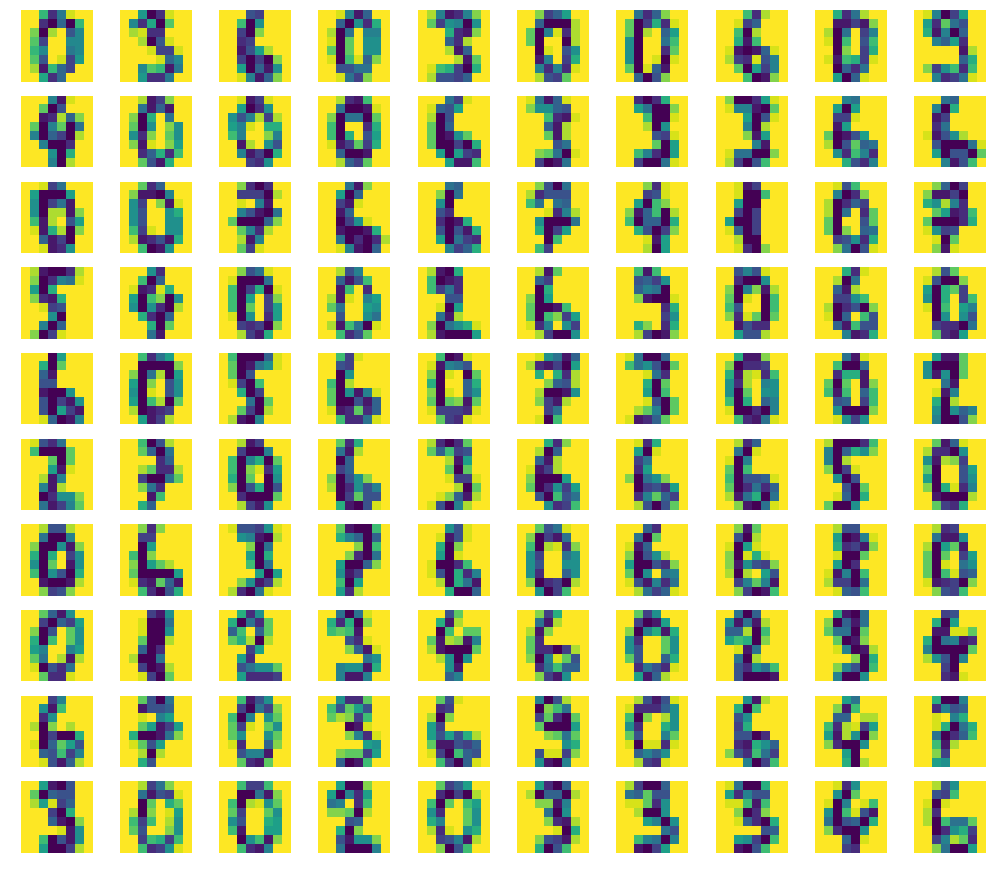

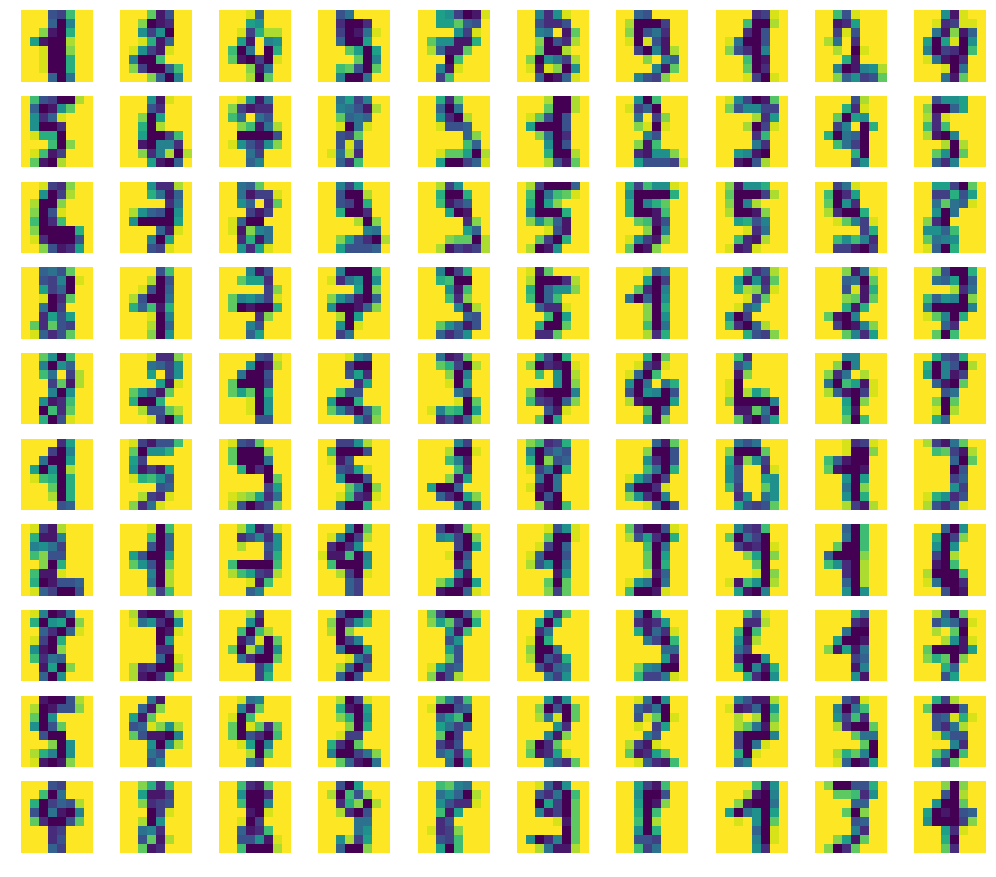

In [12]:
import pylab
from matplotlib import pyplot
%matplotlib inline

X_core = X[core_samples_mask]

def plot_image(image_id, dataset=X, im_size=28):
    plt.imshow(255-dataset[image_id,:].reshape(im_size, im_size))
    
def plot_grid(image_ids, nrows, ncols, dataset=X, im_size=8):
    fig = pyplot.gcf()
    fig.set_size_inches(17.5,15.5)
    for pylab_index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, pylab_index + 1)
        plot_image(example_id, dataset, im_size)
        plt.axis('off')
    plt.show()
    
plot_grid(range(100), nrows=10, ncols=10, dataset=X_core)
X_outter = X[~core_samples_mask]
plot_grid(range(100), nrows=10, ncols=10, dataset=X_outter)

Видим, что неопределенные точки соответствуют в среднем менее читаемым цифрам, чем в core_points.

# Попугаи

In [25]:
X = plt.imread('popugai.png')
X.shape

(1079L, 971L, 3L)

In [26]:
X = X.reshape((-1, 3))

In [27]:
from sklearn.cluster import MiniBatchKMeans

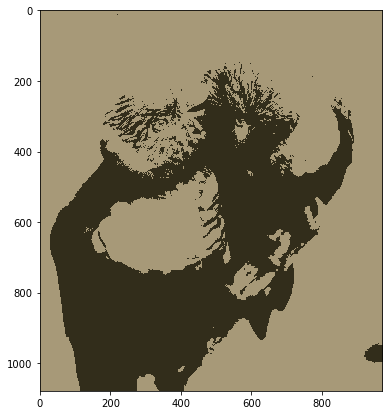

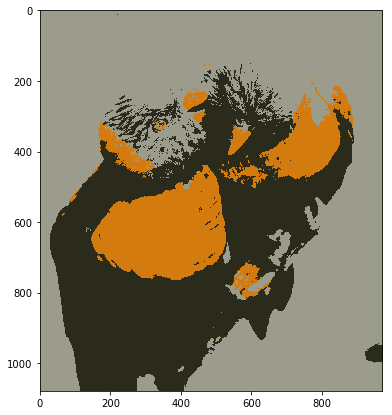

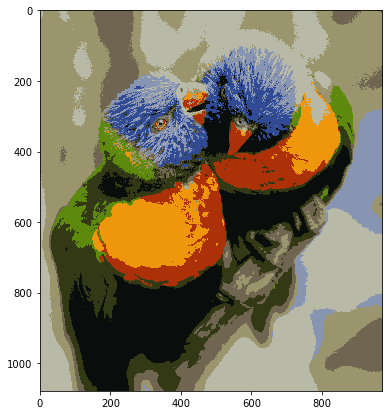

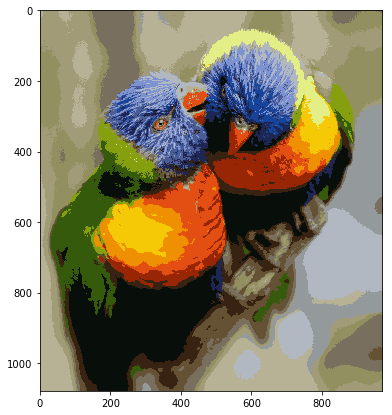

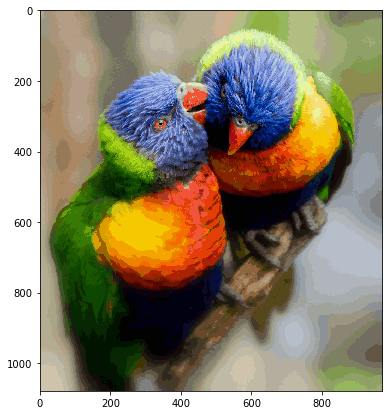

In [28]:
for n_clusters in [2, 3, 10, 20, 100]:
    model = MiniBatchKMeans(n_clusters=n_clusters)
    model.fit(X)
    Y = np.zeros_like(X)
    for k in range(len(X)):
        Y[k] = model.cluster_centers_[model.labels_[k]]
    Y = Y.reshape((1079L, 971L, 3L))
    plt.figure(figsize=(15,7))
    #print X.shape, Y.shape
    plt.imshow(Y)
    plt.show()

^ К Р У Т О